## EXPLORATORY DATA ANALYSIS ON A DATASET


Objective:
The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.


In [2]:
# Data Manipulation
import numpy as np 
import pandas as pd 
# import pandas_profiling

# Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
#	Load the dataset into a DataFrame
url = "https://raw.githubusercontent.com/vijaykalore/DS_Assignments/refs/heads/main/Cardiotocographic.csv"
df = pd.read_csv(url)
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [4]:
df.shape

(2126, 14)

In [48]:
df.size

29764

In [49]:
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [52]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


#●	Handle missing values appropriately (e.g., imputation, deletion).

In [53]:

print("Missing values per column:\n", df.isnull().sum())

# 1. Mean Imputation
df_mean_imputed = df.copy()
df_mean_imputed.fillna(df.mean(), inplace=True)

# 2. Median Imputation
df_median_imputed = df.copy()
df_median_imputed.fillna(df.median(), inplace=True)

# 3. Mode Imputation
df_mode_imputed = df.copy()
for column in df_mode_imputed.columns:
    df_mode_imputed[column].fillna(df_mode_imputed[column].mode()[0], inplace=True)

# 4. Forward Fill Imputation
df_ffill_imputed = df.copy()
df_ffill_imputed.fillna(method='ffill', inplace=True)

# 5. Backward Fill Imputation
df_bfill_imputed = df.copy()
df_bfill_imputed.fillna(method='bfill', inplace=True)

# Display the results
print("Original DataFrame:\n", df)
print("\nMean Imputation:\n", df_mean_imputed)
print("\nMedian Imputation:\n", df_median_imputed)
print("\nMode Imputation:\n", df_mode_imputed)
print("\nForward Fill Imputation:\n", df_ffill_imputed)
print("\nBackward Fill Imputation:\n", df_bfill_imputed)

Missing values per column:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64
Original DataFrame:
               LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.0068

<ipython-input-53-2ece6d08e15d>:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill_imputed.fillna(method='ffill', inplace=True)
<ipython-input-53-2ece6d08e15d>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill_imputed.fillna(method='bfill', inplace=True)


In [54]:
df.fillna(df.mean(), inplace=True)
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [55]:
# drop rows with more than 50% missing values
df_dropped_rows_threshold = df.dropna(thresh=int(df.shape[1] * 0.5))

# drop columns with more than 50% missing values
df_dropped_columns_threshold = df.dropna(axis=1, thresh=int(df.shape[0] * 0.5))

# verify that data has been dropped based on the threshold
print("Data after dropping rows based on threshold:\n", df_dropped_rows_threshold)
print("Data after dropping columns based on threshold:\n", df_dropped_columns_threshold)

Data after dropping rows based on threshold:
               LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tende

In [16]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [56]:
def calculate_statistics(series):
    return {
        'Mean': series.mean(),
        'Median': series.median(),
        'Standard Deviation': series.std(),
        'Interquartile Range (IQR)': series.quantile(0.75) - series.quantile(0.25)}

In [57]:
LB_mean = df['LB'].mean()
AC_mean = df['AC'].mean()
DS_mean = df['DS'].mean()
DP_mean = df['DP'].mean()
MLTV_mean = df['MLTV'].mean()
Width_mean = df['Width'].mean()
Tendency_mean = df['Tendency'].mean()
NSP_mean = df['NSP'].mean()

print(LB_mean,AC_mean,DS_mean,DP_mean,MLTV_mean,Width_mean,Tendency_mean,NSP_mean)

133.3435983550352 0.0032189782438000465 2.5089835057102835e-06 0.000175151211746347 8.284887427063207 70.42926049411918 0.3163714038702473 1.3045071751109625


In [58]:
df['LB'].fillna(LB_mean,inplace=True)
df['AC'].fillna(AC_mean,inplace=True)
df['DS'].fillna(DS_mean,inplace=True)
df['DP'].fillna(DP_mean,inplace=True)
df['MLTV'].fillna(MLTV_mean,inplace=True)
df['Width'].fillna(Width_mean,inplace=True)
df['Tendency'].fillna(Tendency_mean,inplace=True)
df['NSP'].fillna(NSP_mean,inplace=True)

In [59]:
df.isnull().sum()

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


In [60]:
df_corr = df.corr()
df_corr

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.062839,0.018776,-0.166201,-0.126536,-0.005438,-0.047724,0.241857,-0.169561,0.210446,-0.003457,-0.118425,0.236864,0.131843
AC,-0.062839,1.000000,0.009432,0.071863,-0.093196,-0.033101,-0.083277,-0.230439,0.133649,-0.271041,-0.104875,0.234735,0.031977,-0.312022
FM,0.018776,0.009432,1.000000,-0.053226,0.009718,0.029899,0.121274,-0.032691,0.017055,-0.011936,-0.006237,0.097204,-0.018338,0.074048
UC,-0.166201,0.071863,-0.053226,1.000000,0.190128,-0.006922,0.070501,-0.181161,0.189406,-0.227304,-0.049351,0.107159,-0.066463,-0.185001
DL,-0.126536,-0.093196,0.009718,0.190128,1.000000,0.058430,0.144940,-0.069361,0.410102,-0.186967,-0.165198,0.408664,-0.023490,0.025342
DS,-0.005438,-0.033101,0.029899,-0.006922,0.058430,1.000000,0.004285,0.008425,0.016077,-0.004392,0.034349,0.040832,-0.015398,0.065400
DP,-0.047724,-0.083277,0.121274,0.070501,0.144940,0.004285,1.000000,0.038117,0.119250,-0.077654,-0.114084,0.175340,-0.130395,0.294472
ASTV,0.241857,-0.230439,-0.032691,-0.181161,-0.069361,0.008425,0.038117,1.000000,-0.293882,0.357497,-0.219728,-0.206942,-0.010892,0.421313
MSTV,-0.169561,0.133649,0.017055,0.189406,0.410102,0.016077,0.119250,-0.293882,1.000000,-0.291935,0.028779,0.433064,-0.036660,-0.094630
ALTV,0.210446,-0.271041,-0.011936,-0.227304,-0.186967,-0.004392,-0.077654,0.357497,-0.291935,1.000000,-0.107568,-0.345997,0.036722,0.365357


In [29]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    print('Old Shape',IQR)
    print("\n")
    lower_bound = Q1 - 1.5 * IQR
    print('Lower :', lower_bound)
    print("\n")
    upper_bound = Q3 + 1.5 * IQR
    print('Upper :',upper_bound)
    print("\n")
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print("df_out",df_out)
df = remove_outliers(df, 'LB')

Old Shape 14.0


Lower : 105.0


Upper : 161.0


df_out               LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Wi

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

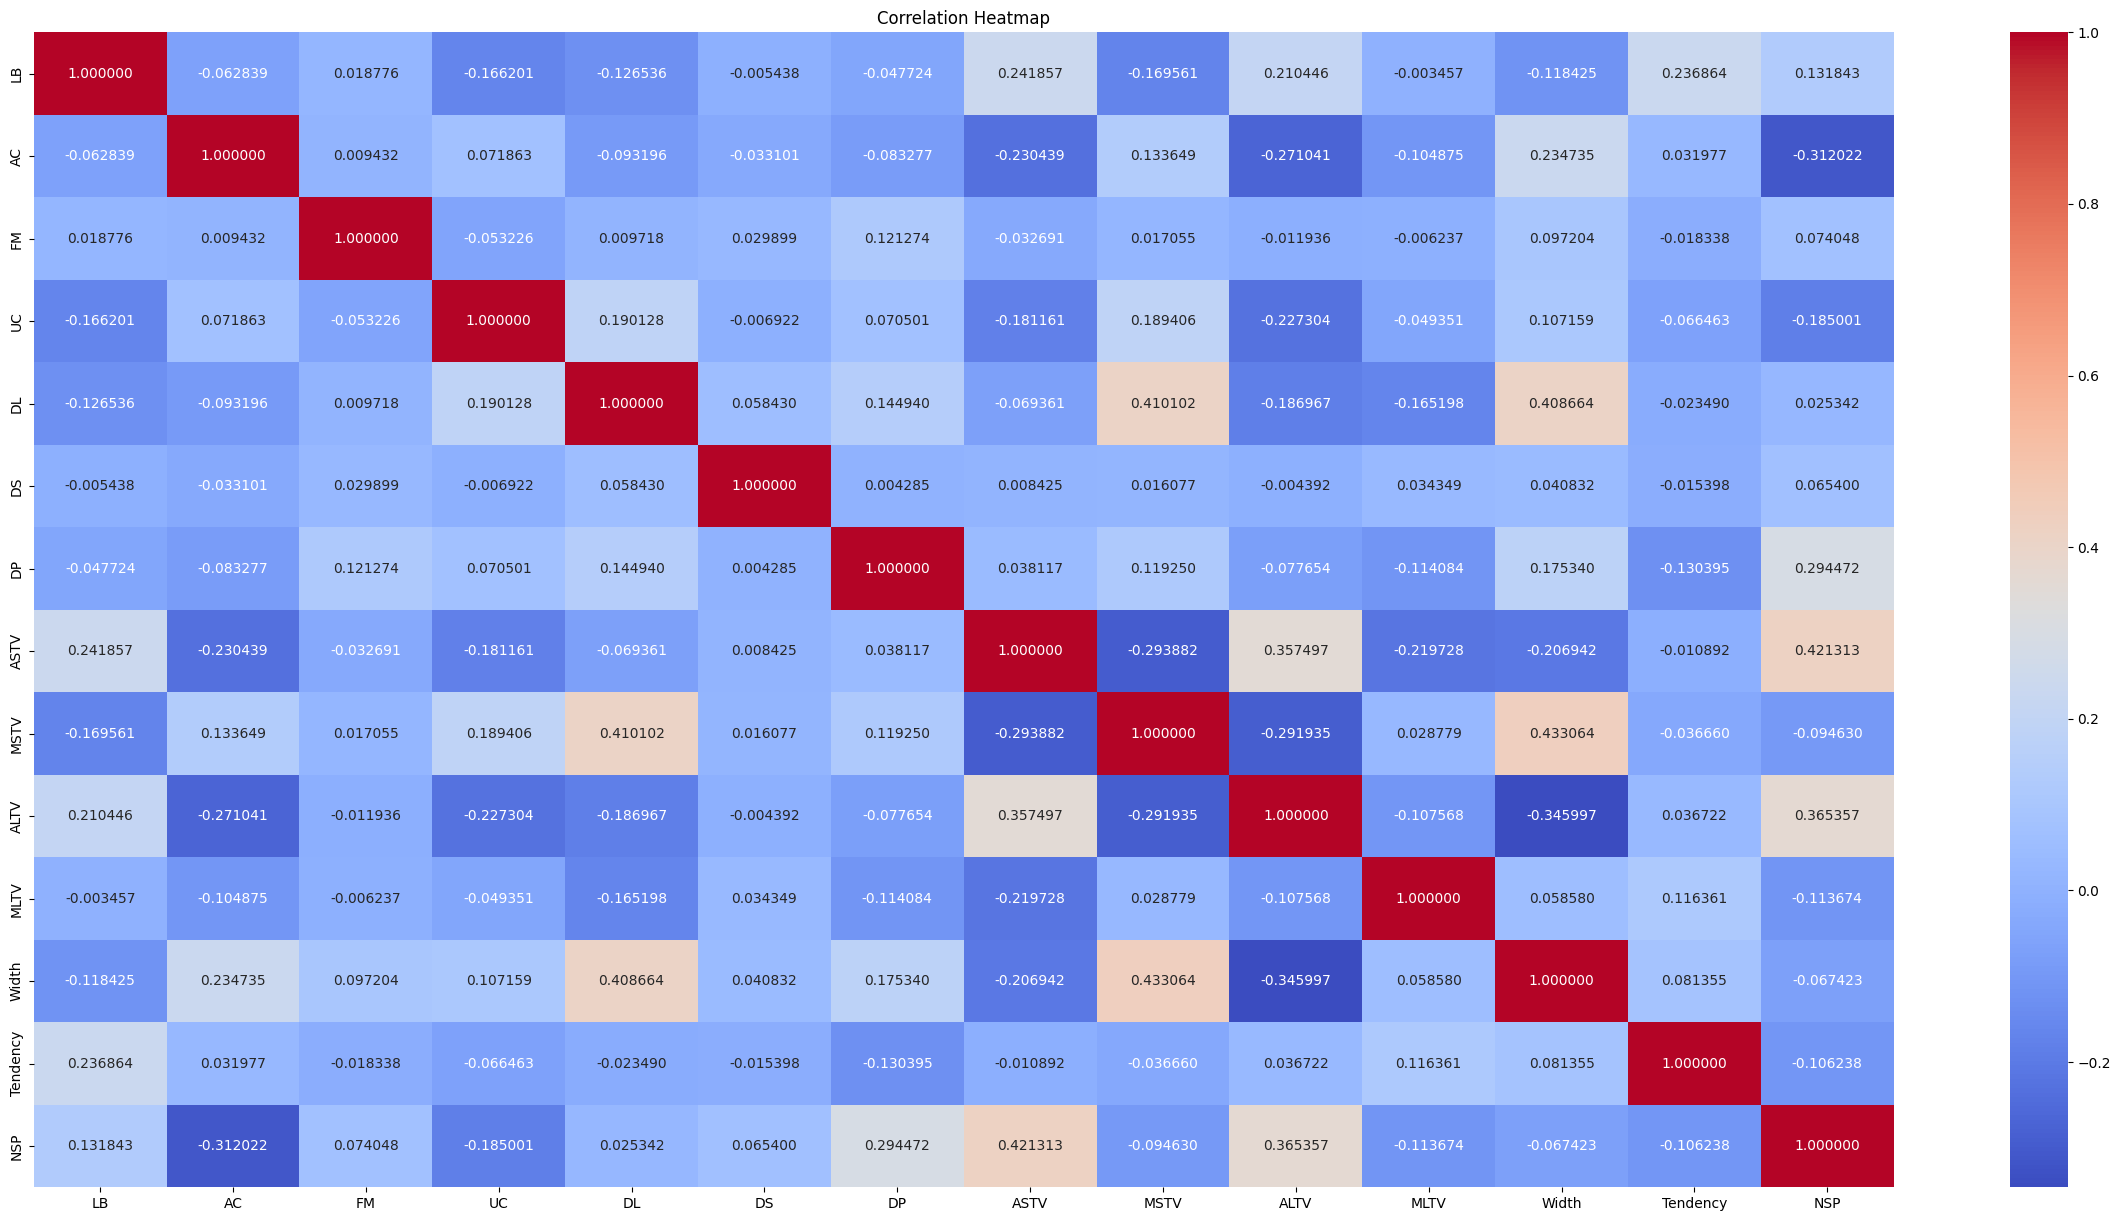

In [64]:
plt.figure(figsize=(30,15))
sns.heatmap(df_corr,annot=True,cmap='coolwarm',fmt='2f')
plt.title("Correlation Heatmap")
plt.show()

<Axes: >

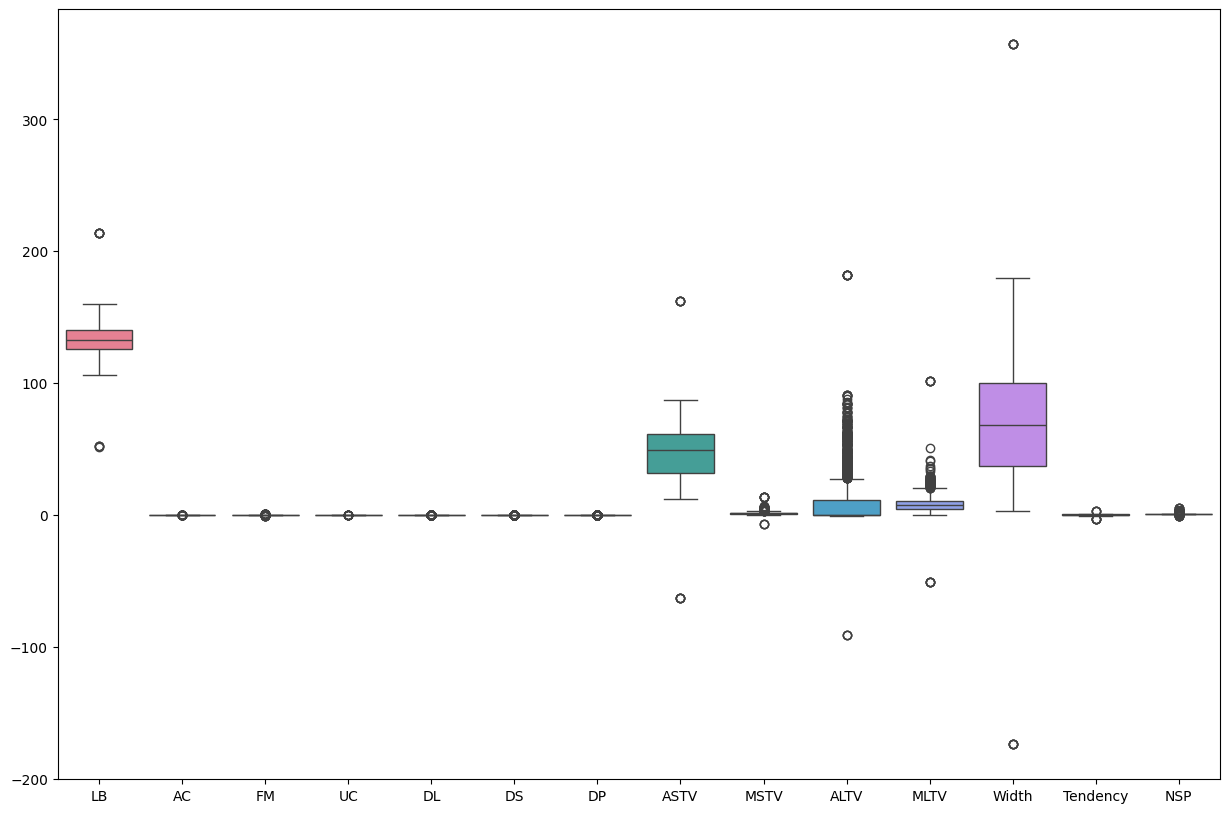

In [68]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

<Axes: ylabel='Count'>

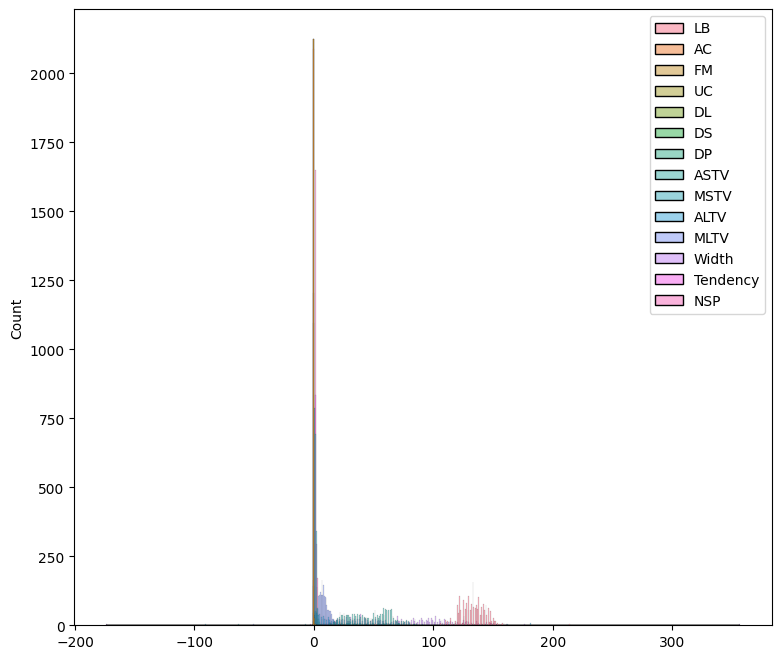

In [69]:
plt.figure(figsize=(9,8))
sns.histplot(data=df)

<Axes: >

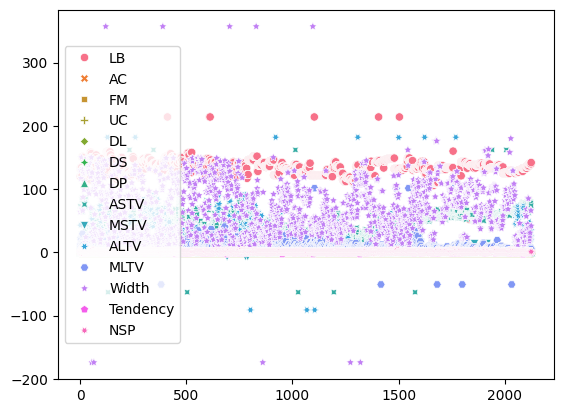

In [70]:
sns.scatterplot(data=df)

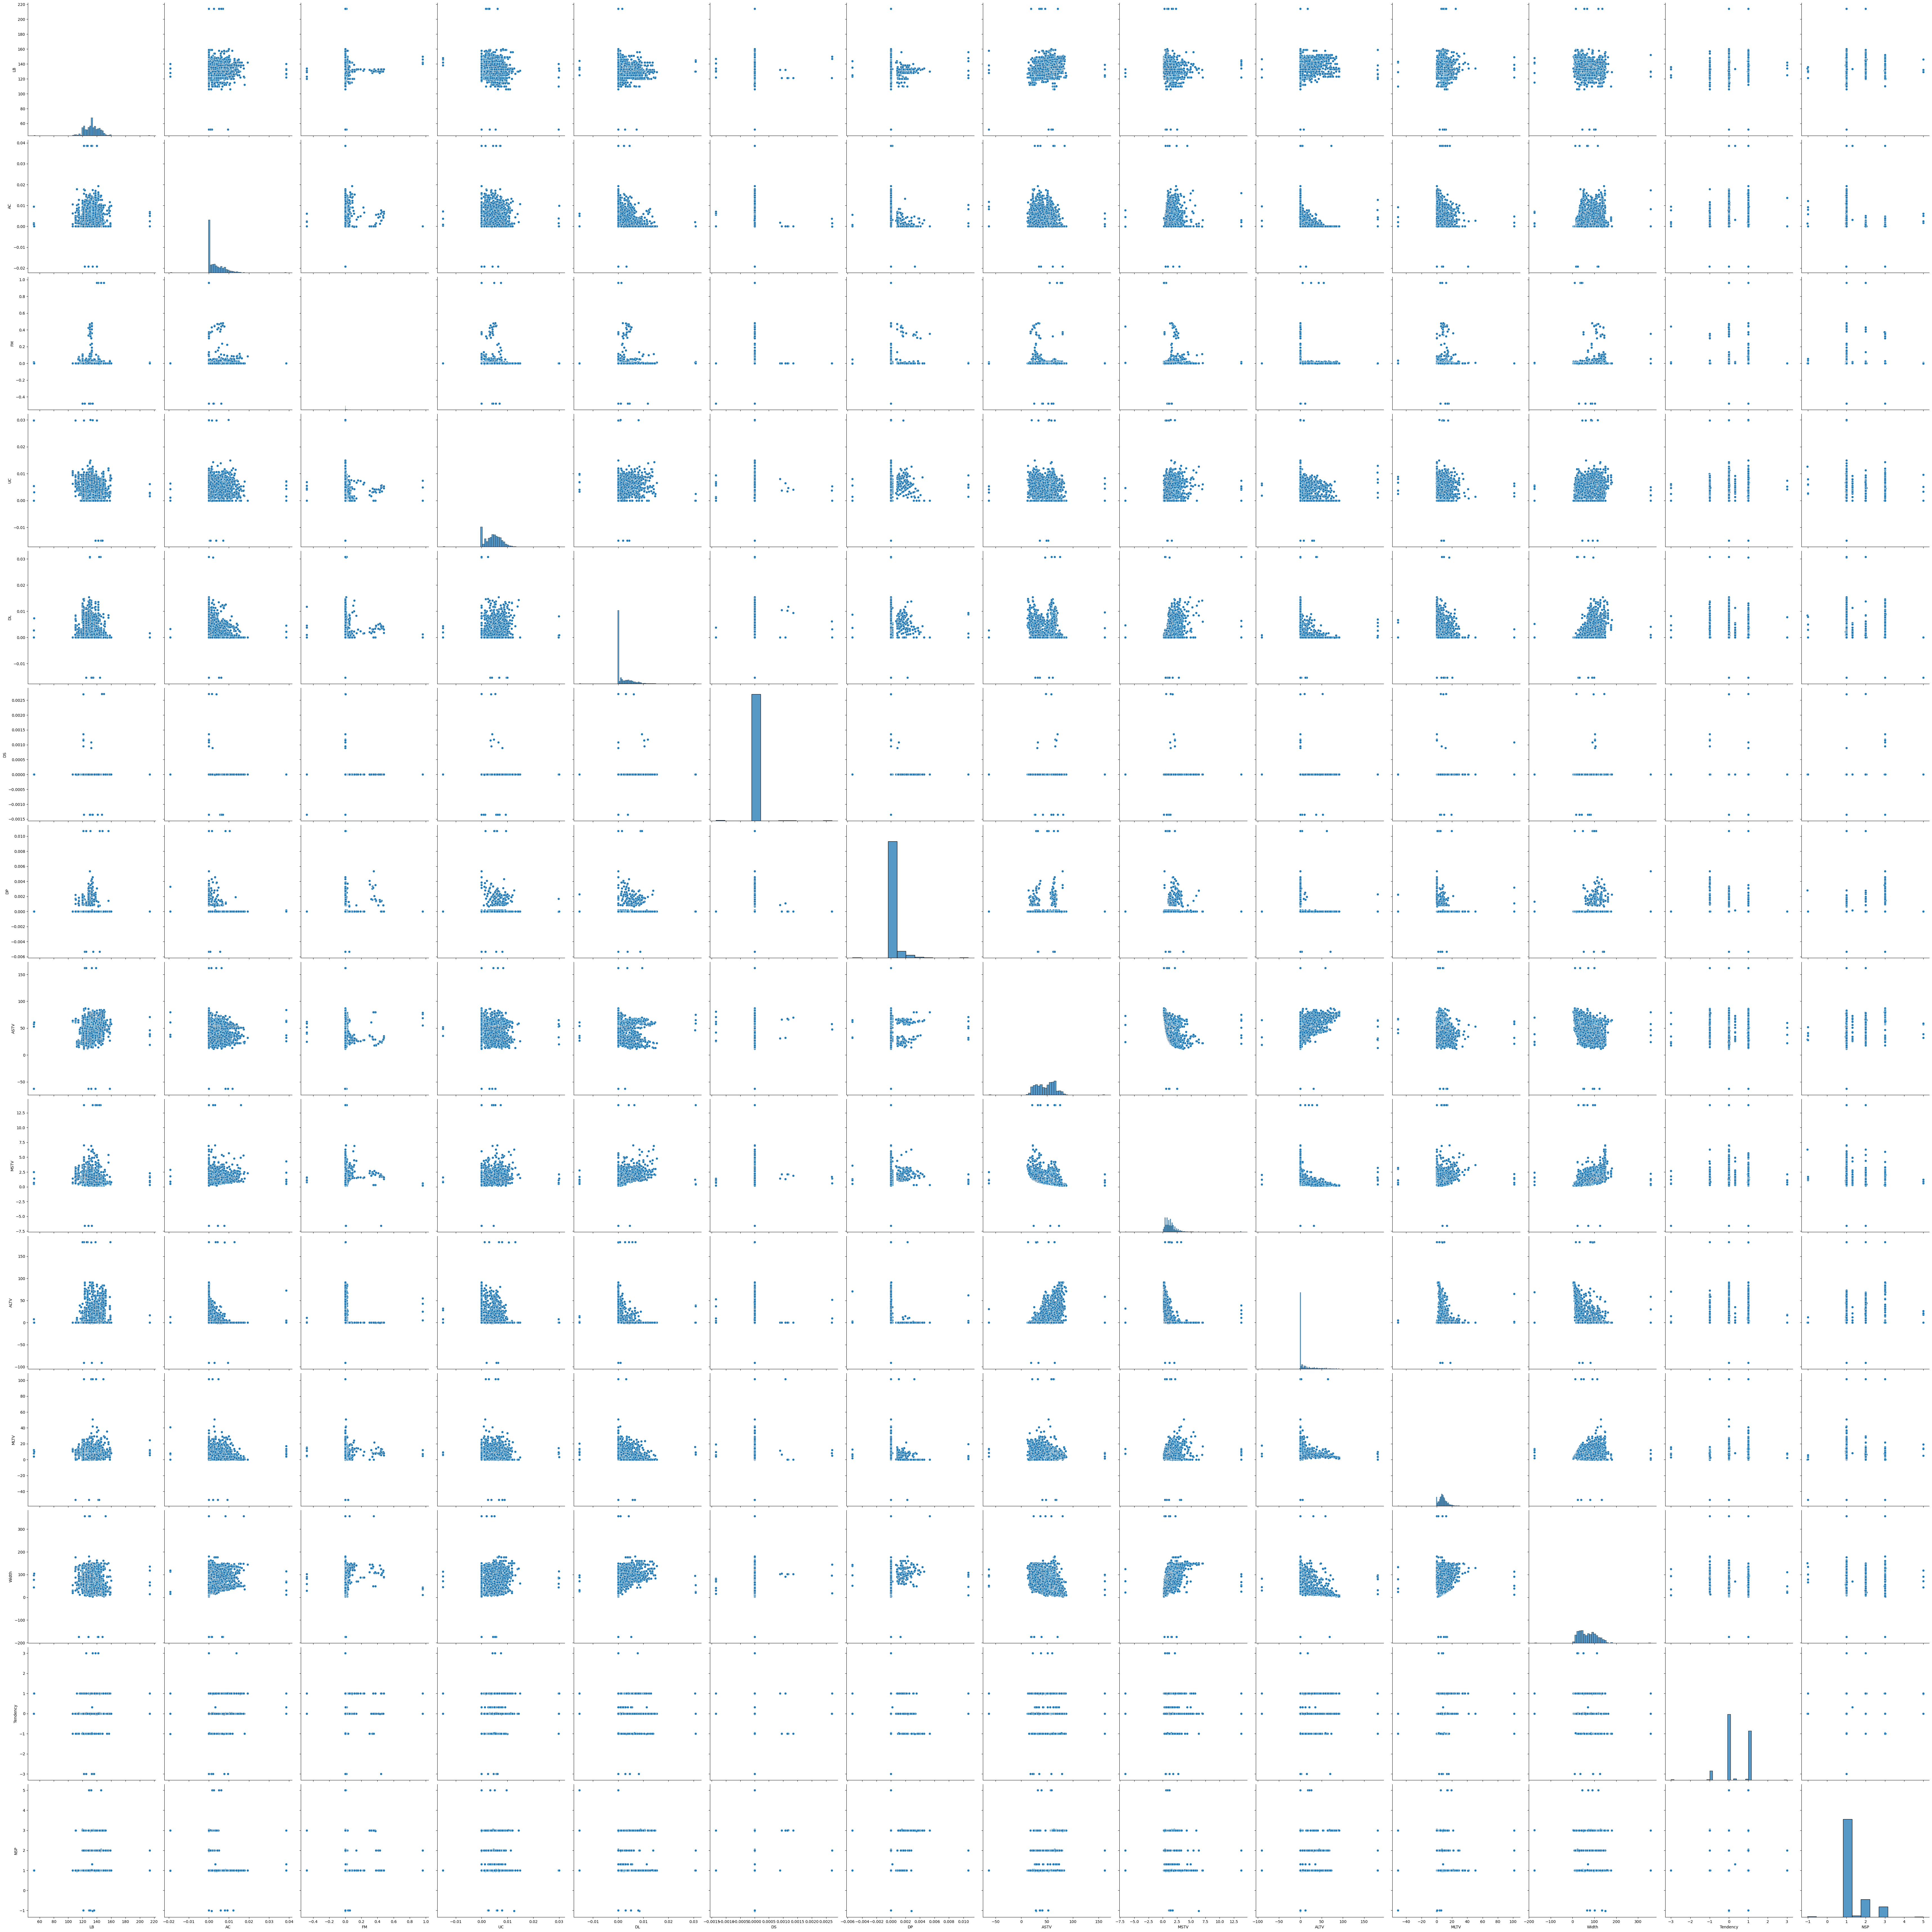

In [71]:
sns.pairplot(data=df,height=5)

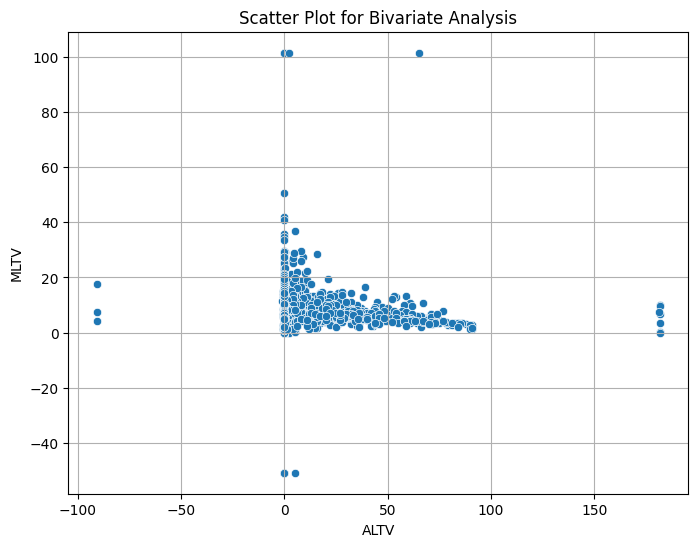

In [72]:
# Scatter plot for bivariate analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='ALTV', y='MLTV')
plt.title('Scatter Plot for Bivariate Analysis')
plt.xlabel('ALTV')
plt.ylabel('MLTV')
plt.grid(True)
plt.show()

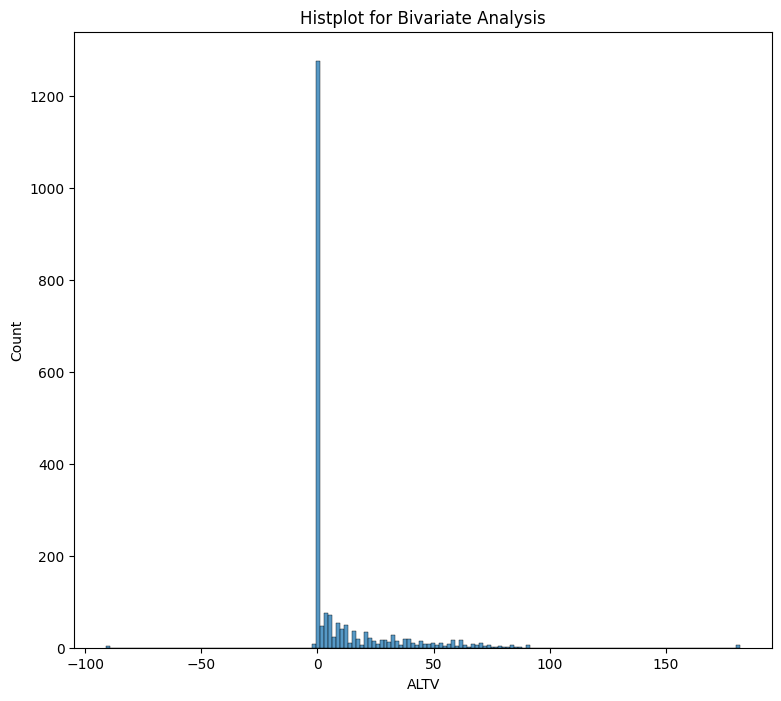

In [73]:
plt.figure(figsize=(9,8))
sns.histplot(x='ALTV',data=df)
plt.title('Histplot for Bivariate Analysis')
#plt.xlabel('ALTV')
#plt.ylabel('Count')
#plt.grid(True)
plt.show()